In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
%matplotlib inline

In [6]:
def get_sub_oof(t):
    """
    Grab the sub and oof files for a give type. 
    """
    oof = []
    sub = []
    model_ids = []
    for file in sorted(os.listdir(f'../type_results/{t}/')):
        if ('sub' in file) and ('3folds' in file):
            model_id = file[:4] + file.split('MAE_')[1].replace('L','')
            model_ids.append(model_id)
            df = pd.read_parquet(f'../type_results/{t}/{file}')
            df.index = df.id.values
            if len(sub) == 0:
                sub = df.rename(columns={'scalar_coupling_constant': model_id})
            else:
                sub[model_id] = df['scalar_coupling_constant']
        elif ('oof' in file) and ('3folds' in file):
            model_id = file[:4] + file.split('MAE_')[1].replace('L','')
            #print(model_id)
            df = pd.read_parquet(f'../type_results/{t}/{file}')
            df.index = df.id.values
            if len(oof) == 0:
                oof = df.rename(columns={'oof_preds': model_id})
            else:
                oof[model_id] = df['oof_preds']
    sub = sub.loc[sub['type'] == t]
    oof = oof.loc[oof['type'] == t]
    return sub, oof, model_ids

In [7]:
sub, oof, model_ids = get_sub_oof('1JHC')

In [12]:
for p in ['K004-0.7783','M048-0.8258','M053-0.8639','M055-0.8641']:
    oof[p+'_error'] = np.abs(oof[p] - oof['scalar_coupling_constant'])

In [15]:
error_cols = [c for c in oof.columns if '_error' in c]

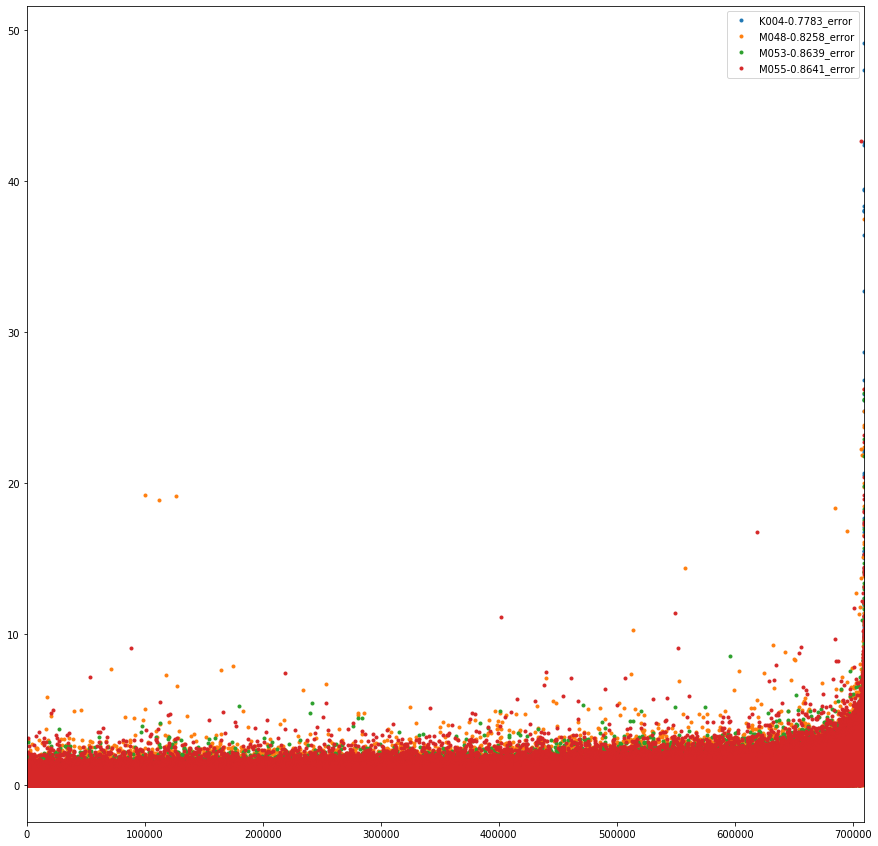

In [24]:
oof[error_cols].sort_values(error_cols[0]) \
    .reset_index(drop=True) \
    .plot(style='.', figsize=(15, 15))
plt.show()

In [37]:
oof['max_error'] = oof[error_cols].max(axis=1)
oof['avg_error'] = oof[error_cols].mean(axis=1)

In [ ]:
train = pd.read_csv('../input/train.csv')

In [42]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [43]:
oof['molecule_name'] = train['molecule_name']

In [53]:
mol_error = oof.groupby('molecule_name')['avg_error'].agg(['mean','max','count'])

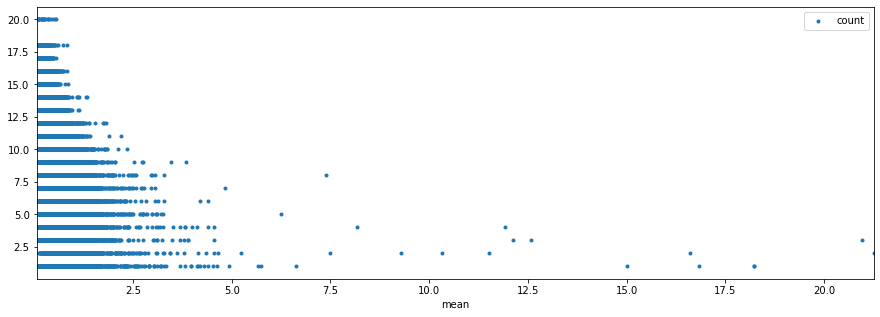

In [57]:
mol_error.plot(x='mean', y='count', style='.', figsize=(15, 5))

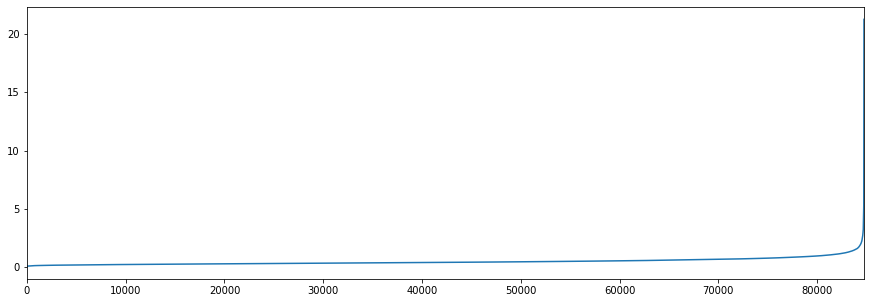

In [62]:
mol_error.sort_values('mean').reset_index(drop=True)['mean'].plot(figsize=(15, 5))

In [73]:
mol_error = oof.groupby('molecule_name')[['scalar_coupling_constant','avg_error']].agg(['mean','max','min','count'])

In [81]:
mol_error.loc[mol_error['avg_error']['mean'] > 5]

scalar_coupling_constant                            \
                                     mean       max       min count   
molecule_name                                                         
dsgdb9nsd_000001                84.808450   84.8095   84.8074     4   
dsgdb9nsd_000005               171.220000  171.2200  171.2200     1   
dsgdb9nsd_007241               157.684000  157.6840  157.6840     1   
dsgdb9nsd_021437               142.740000  142.7400  142.7400     1   
dsgdb9nsd_021737               145.449000  145.4490  145.4490     1   
dsgdb9nsd_024999               107.131100  118.3360   95.9262     2   
dsgdb9nsd_047277               102.608900  108.2420   96.9758     2   
dsgdb9nsd_051246               118.389000  133.0020  109.0550     3   
dsgdb9nsd_054487               113.255880  132.9780   88.7404     5   
dsgdb9nsd_054618               112.176500  121.4360  102.9170     2   
dsgdb9nsd_059827                98.486450  111.9450   78.4783     8   
dsgdb9nsd_112151                90.474167   91.9394   88.2630     3   
dsgdb9nsd_123289               203.404000  203.4040  203.4040     1   
dsgdb9nsd_128113               105.012075  128.6460   91.8594     4   
dsgdb9nsd_129053               140.700500  145.1090  136.2920     2   
dsgdb9nsd_129152               158.031000  158.0310  158.0310     1   
dsgdb9nsd_129289               130.493500  136.9130  124.0740     2   
dsgdb9nsd_129336               116.615000  116.6150  116.6150     1   
dsgdb9nsd_129401               124.511500  128.7980  120.2250     2   
dsgdb9nsd_130535               146.106000  150.5330  140.6500     3   
dsgdb9nsd_133621                83.621500   83.6221   83.6209     2   

                  avg_error                              
                       mean        max        min count  
molecule_name                                            
dsgdb9nsd_000001  11.916634  12.023228  11.804532     4  
dsgdb9nsd_000005  15.020434  15.020434  15.020434     1  
dsgdb9nsd_007241   6.635670   6.635670   6.635670     1  
dsgdb9nsd_021437   5.742265   5.742265   5.742265     1  
dsgdb9nsd_021737   5.655804   5.655804   5.655804     1  
dsgdb9nsd_024999   9.288885  11.237141   7.340628     2  
dsgdb9nsd_047277  10.318234  11.087376   9.549093     2  
dsgdb9nsd_051246  12.590975  24.282961   3.223091     3  
dsgdb9nsd_054487   6.250503   8.943136   2.549249     5  
dsgdb9nsd_054618  16.595348  22.886285  10.304411     2  
dsgdb9nsd_059827   7.388271  11.921429   2.555620     8  
dsgdb9nsd_112151  12.119192  12.618439  11.410010     3  
dsgdb9nsd_123289  16.827338  16.827338  16.827338     1  
dsgdb9nsd_128113   8.167743  14.467060   5.456155     4  
dsgdb9nsd_129053  21.256226  22.543473  19.968979     2  
dsgdb9nsd_129152  18.233945  18.233945  18.233945     1  
dsgdb9nsd_129289   5.229657   7.627102   2.832212     2  
dsgdb9nsd_129336  18.220913  18.220913  18.220913     1  
dsgdb9nsd_129401   7.489352   8.947565   6.031138     2  
dsgdb9nsd_130535  20.971600  24.418290  18.717557     3  
dsgdb9nsd_133621  11.507384  11.685036  11.329733     2

In [83]:
train_type = pd.read_parquet('../data/FE021/FE021-train-1JHC.parquet')

In [82]:
train.loc[train['molecule_name'].isin(['dsgdb9nsd_054487'])]

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
1676734,1676734,dsgdb9nsd_054487,8,3,3JHC,3.101840
1676735,1676735,dsgdb9nsd_054487,8,5,3JHN,-0.695951
1676736,1676736,dsgdb9nsd_054487,8,6,2JHC,5.931490
1676737,1676737,dsgdb9nsd_054487,8,7,1JHN,55.960600
1676738,1676738,dsgdb9nsd_054487,8,9,2JHC,4.139300
1676739,1676739,dsgdb9nsd_054487,8,12,3JHH,0.234589
1676740,1676740,dsgdb9nsd_054487,8,13,3JHH,0.776582
1676741,1676741,dsgdb9nsd_054487,8,14,3JHH,1.049300
1676742,1676742,dsgdb9nsd_054487,10,1,3JHC,2.365430
1676743,1676743,dsgdb9nsd_054487,10,3,2JHC,0.433912


In [66]:
train.loc[train['molecule_name'] == 'dsgdb9nsd_000001']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095


In [67]:
train.loc[train['molecule_name'] == 'dsgdb9nsd_000005']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
17,17,dsgdb9nsd_000005,2,0,1JHC,171.22000
18,18,dsgdb9nsd_000005,2,1,2JHN,5.18246


In [72]:
train.loc[train['molecule_name'] == 'dsgdb9nsd_007241']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
194216,194216,dsgdb9nsd_007241,8,0,1JHN,59.516700
194217,194217,dsgdb9nsd_007241,8,1,2JHC,-2.099090
194218,194218,dsgdb9nsd_007241,8,3,3JHC,7.141510
194219,194219,dsgdb9nsd_007241,8,9,2JHH,6.529790
194220,194220,dsgdb9nsd_007241,9,0,1JHN,60.768500
194221,194221,dsgdb9nsd_007241,9,1,2JHC,2.703070
194222,194222,dsgdb9nsd_007241,9,3,3JHC,1.648620
194223,194223,dsgdb9nsd_007241,10,1,3JHC,10.093200
194224,194224,dsgdb9nsd_007241,10,3,2JHC,-12.506800
194225,194225,dsgdb9nsd_007241,10,4,1JHN,34.957700


In [41]:
train.loc[train['id'] == 4609823]

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
4609823,4609823,dsgdb9nsd_130535,10,5,1JHC,147.135


# Features of High error

In [88]:
train_type.head()

,10th_closest_to_1_valence_x_cube_inv_dist,12th_closest_to_1_valence,13th_closest_to_1_exact_mass,17th_closest_to_0_spin_multiplicity,17th_closest_to_0_valence,17th_closest_to_0_valence_x_cube_inv_dist,17th_closest_to_1_spin_multiplicity,18th_closest_to_0_exact_mass,19th_closest_to_0_spin_multiplicity,19th_closest_to_1_spin_multiplicity_x_cube_inv_dist,...,tor_ang_2leftleft_count,tor_ang_2leftleft_max,tor_ang_2leftleft_min,val_not_0_mean,val_not_1_mean,val_not_1_std,yukawa_H.x,yukawa_H.y,yukawa_N.x,yukawa_O.y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.75,1.0,0.0,0.504328,1.342247,0.000000,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.75,1.0,0.0,0.504327,1.342247,0.000000,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.75,1.0,0.0,0.504323,1.342247,0.000000,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.75,1.0,0.0,0.504323,1.342247,0.000000,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.50,1.0,0.0,0.000000,0.344177,0.108789,0.0


In [89]:
train_type['error'] = oof['avg_error'].values

In [97]:
fi = pd.read_parquet('../type_results/1JHC/meta/M055_0726_2356_1JHC_fi_meta_fc_f1_0.5535MAE_-0.5915LMAE.parquet')

In [101]:
fi.sort_values('importance').tail()

,feature,importance,type,fold
66,a0_nb_inring3,7.466301,1JHC,1
77,a1_inring3,9.495728,1JHC,2
77,a1_inring3,9.529022,1JHC,1
63,a0_nb_degree,9.928061,1JHC,1
63,a0_nb_degree,9.970763,1JHC,2


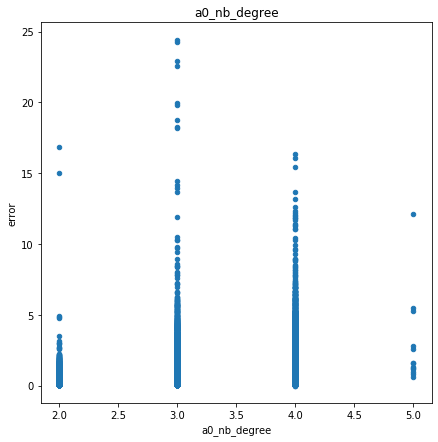

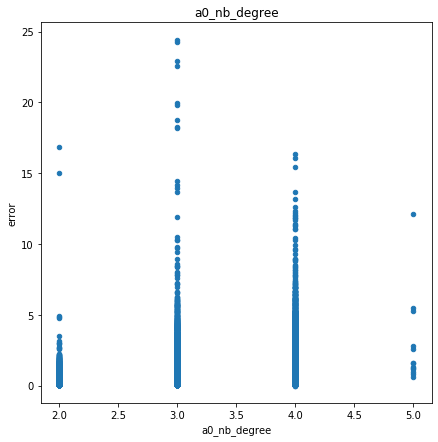

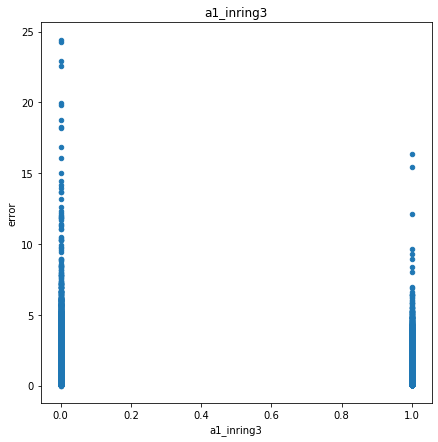

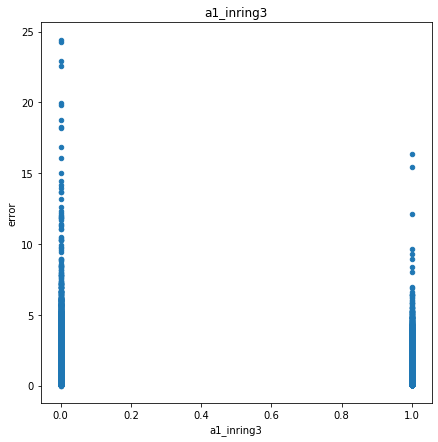

In [100]:
count = 0
for col in ['a0_nb_degree','a0_nb_degree','a1_inring3','a1_inring3']:
    train_type.plot(x=col, y='error', kind='scatter', title=col, figsize=(7, 7))
    plt.show()
    if count == 5:
        break
    count += 1